# Iris classifier with Knn 
In this notebook, I'm going to try make a project that can classify a flower from the Iris dataset and try to predict the class.

The libraries that I´m going to use:

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Creation of dataframe and general info

In [67]:
col_names = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'class']
df = pd.read_csv('../data/raw/iris/iris.data', header = None, names = col_names)
df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df.describe() 

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are not any NaNs and we have four numerical variables and one object that is the class that I'm going to try to predict (target)

### EDA

In [70]:
df.groupby('class').agg(['mean', 'median', 'std'])

sepal_lenght                  sepal_width                   \
                        mean median       std        mean median       std   
class                                                                        
Iris-setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
Iris-versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
Iris-virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

                petal_lenght                  petal_width                   
                        mean median       std        mean median       std  
class                                                                       
Iris-setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
Iris-versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
Iris-virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

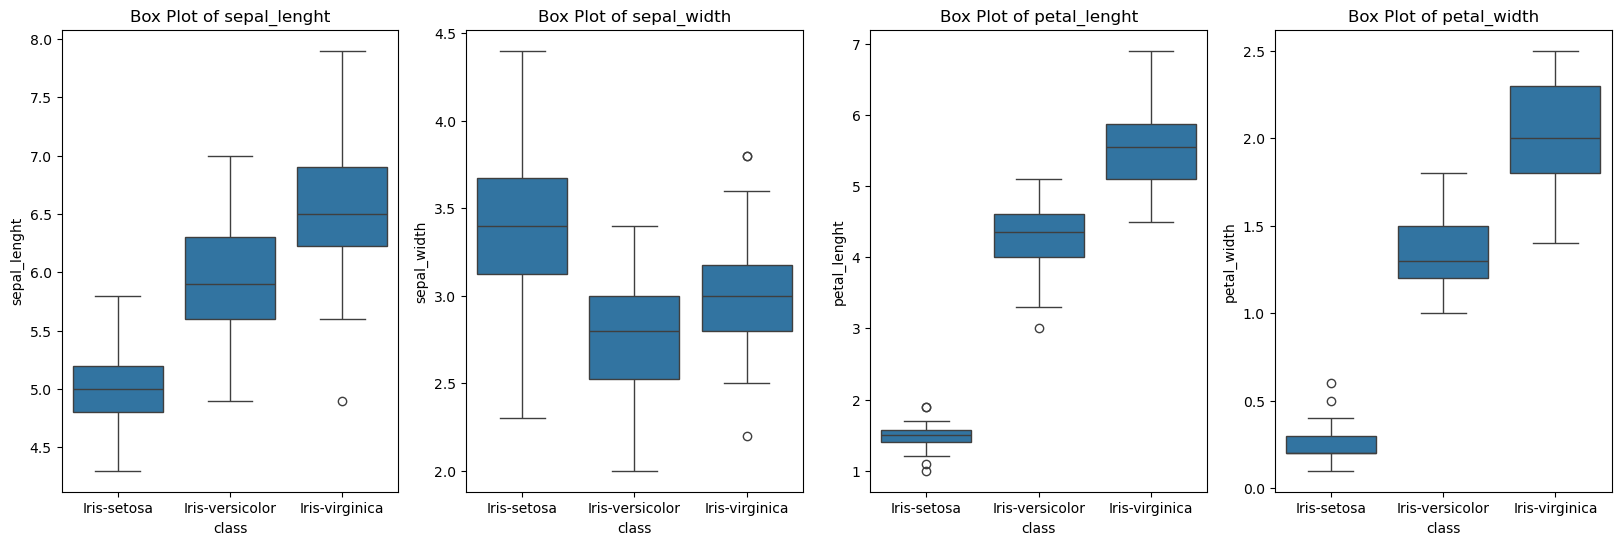

In [71]:
num_cols = len(col_names[:-1])
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
for i, column in enumerate(col_names[:-1]):
    sns.boxplot(data=df, x='class', y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

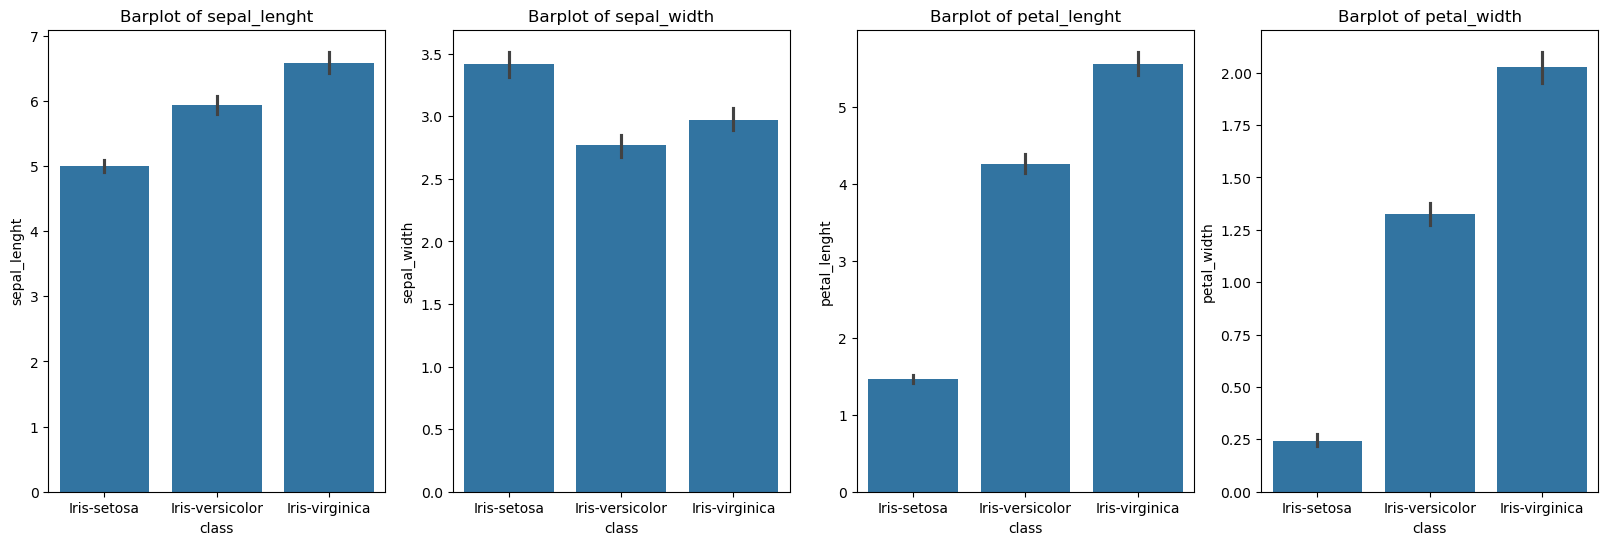

In [72]:
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
for i, column in enumerate(col_names[:-1]):
    sns.barplot(data=df, x='class', y=column, ax=axes[i])
    axes[i].set_title(f'Barplot of {column}')

### Preparation of data and classification

The Knn algorithm works with distances so in order to get the optimal result we need to scale our numerical columns

In [73]:
# Creation of the object
clf = KNeighborsClassifier()
sscaler = StandardScaler()

In [74]:
df[col_names[:-1]] = sscaler.fit_transform(df[col_names[:-1]])
df[col_names[:-1]].head()

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [75]:
# Define the training data and the testing data
X = df[col_names[:-1]]
y = df[col_names[-1]].astype('category').cat.codes
print(X.shape, y.shape)


(150, 4) (150,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Training

In [77]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
clf.score(X_test, y_test)

0.9333333333333333

We got such a good result because of there aren't that many outliers and the classes aren't too close.